# Support Vector Machines
## IE 7860 Winter 20202
## Kayleigh James

For this project I will be using a data set from the University of California - Irvine repository regarding diagnosis of breast cancer from attributes of an image of the mass:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The attribute we will be predicting is diagnosis (benign or malignant).  This is a **binary classification** problem.  The other attributes available as predictors are as follows:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

To start we load in the .csv as a pandas dataframe:

In [1]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can disregard the id column as loading the dataset into a pandas dataframe assigns each pattern an index.  Now let's drop that column:

In [2]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)

We can also get some summary statistics of the data:

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


And the dimensions of the dataset:

In [4]:
df.shape

(569, 31)

So we can see that we have 569 observations (i.e. patterns) and 31 inputs.  We should also check and see how balanced our classes are: 

In [5]:
df[df.diagnosis == 'M'].shape[0]

212

So we have 212 observations of malignant tumors which means we have 357 observations of benign tumors. This is pretty balanced so I don't think it is necessary to balance the dataset.

Before we continue we should make sure all of the features are the data type we're anticipating (floating point numbers aside from the diagnosis).

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

We can see that the dataframe contains values in the type that we expect.  Now let's see if any cleaning is needed by checking for observations will NULL values.

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no null values in the data set so let's check if there are any duplicates.

In [8]:
df.duplicated().sum()

0

We have confirmed there are no duplicates in the data.  Now we need to to get the data in the correct format and normalize it, we will use the sklearn package to do so.  We normalize the inputs in order to prevent an unstable and slow learning process.  The standard scaler will transform the input variables so that they are Gaussian with 0 mean and unit variance.  We encode the output variable in order for the SVMs to make sense of it.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#X is the input dataset
X = df.iloc[:,1:]

#y are the class labels/expected outputs
y = df.iloc[:,0]

#for y, we want to change the format from categorical to 1's and 0's, malignant will be 1, benign a 0
le = LabelEncoder()
y = le.fit_transform(y)

#for X, we need to scale all of the values before feeding into the neural network
scaler = StandardScaler()
X = scaler.fit_transform(X)

#form a test/train split, 15% of the data will be reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Now that we have normalized the data, encoded our outputs, and created a test/train split, we can move onto building our SVMs.  We will be creating four different types of SVMs available through the scikit learn.  We will train each of these, evaluate them using our test dataset, and compare performance across the different types of SVMs.  We can also compare this performance to the performance of the multi-layer perceptron on this dataset.

SVC with linear kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

   micro avg       1.00      1.00      1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

LinearSVC (linear kernel)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

   micro avg       1.00      1.00      1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

SVC with RBF kernel
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        35
           1       1.00      0.14      0.24        22

   micro avg       0.67      0.67      0.67        57
   macro avg       0.82      0.57      0.51        57
weigh

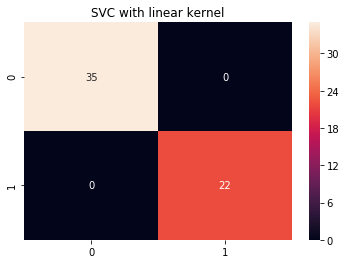

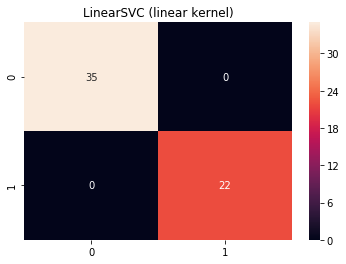

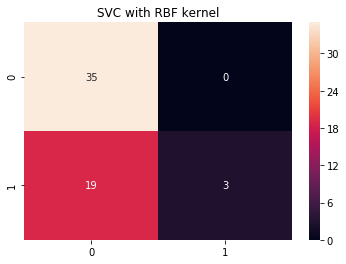

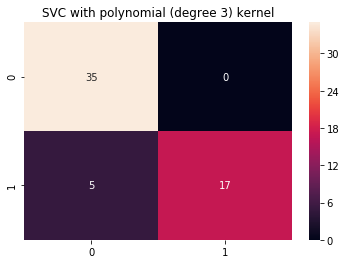

In [11]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
for clf, title, in zip(models, titles):
    y_pred = clf.predict(X_test)
    print(title)
    print(classification_report(y_test, y_pred))
    plt.figure()
    plt.title(title)
    #Build a confusion matrix comparing the true values of y and the predicted values of y
    matrix = confusion_matrix(y_test, y_pred)

    #Plot the confusion matrix as a seaborn heatmap
    sns.heatmap(matrix,annot=True)

We can see that SVC with linear kernel and LinearSVC (linear kernel) both achieved 100% accuracy.  The third best model was SVC with polynomial (degree 3) kernel which only misclassified 5 of the observations.  The worst performing model was the SVC with RBF kernel which wrongly classified 19 of the observations in the test set.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries because LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

Since the non-linear kernel models can have more flexible decision boundaries, I think that those models overfit on the training set and when run with the test set they did not generalize well and hence performed more poorly than the linear models.  

When comparing the linear models to the MLP, none of the MLPs built reached 100% accuracy on the test set (most usually had one misclassification on the test set).  This demonstrates how difficult it is to beat the performance of SVMs on binary classification problems.  